In [6]:
from mylibs.dataloader_dict import *
from mylibs.trainer import *
import torch
import torch.nn as nn
import os
import torch.utils.data as data
from importlib import import_module
import matplotlib.pyplot as plt
import torch.optim as optim
import copy

vggish_input=import_module(".torchvggish.vggish_input","torchvggish-master_changed")
use_pretrained = True

#GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))
labels=["Speech","Music","Silence","Siren","Vehicle","Wind"]

Using cuda device


vggish/embedding:0
C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\Music100Speech100.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\Music10Speech10.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\MusicSilenceSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\MusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\MusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\MusicSpeech.jb']
joblib.loadします
train用データの数：674
valid用データの数：347
Epoch 1/100
train Loss: 1.769793 Acc: 0.202763
valid Loss: 1.742383 Acc: 0.317762
Epoch 2/100
train Loss: 1.755950 Acc: 0.281194
valid Loss: 1.723415 Acc: 0.375433
Epoch 3/100
train Loss: 1.751756 Acc: 0.309269
valid Loss: 1.712053 Acc: 0.436563
Epoch 4/100
train Loss: 1.749822 Acc: 0.323084
valid Loss: 1.703741 Acc: 0.482699
Epoch 5/100
t

train Loss: 1.739105 Acc: 0.394831
valid Loss: 1.629090 Acc: 0.642445
Epoch 93/100
train Loss: 1.738640 Acc: 0.397950
valid Loss: 1.628883 Acc: 0.645905
Epoch 94/100
train Loss: 1.738694 Acc: 0.400921
valid Loss: 1.628709 Acc: 0.645905
Epoch 95/100
train Loss: 1.739259 Acc: 0.387849
valid Loss: 1.628454 Acc: 0.645329
Epoch 96/100
train Loss: 1.738423 Acc: 0.399733
valid Loss: 1.628277 Acc: 0.645329
Epoch 97/100
train Loss: 1.738635 Acc: 0.396762
valid Loss: 1.628001 Acc: 0.644752
Epoch 98/100
train Loss: 1.739068 Acc: 0.393494
valid Loss: 1.627792 Acc: 0.644752
Epoch 99/100
train Loss: 1.738822 Acc: 0.398693
valid Loss: 1.627616 Acc: 0.644752
Epoch 100/100
train Loss: 1.738849 Acc: 0.398544
valid Loss: 1.627475 Acc: 0.644752


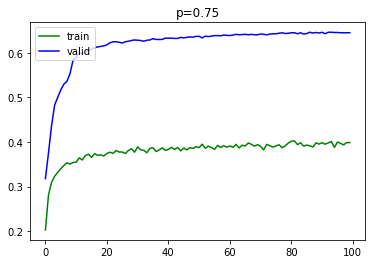

In [2]:

mymodel10=trainer(_print=False,_lr=1,_classfilter=nn.Sequential(
                            nn.Linear(128,64),
                            nn.Dropout(p=0.75),
                            nn.Sigmoid(),
                            nn.Linear(64,6),
                            nn.Softmax(dim=1)
                            ) )
dataloader_dict10=get_dataloader_dict(labels)
mymodel10.train(dataloader_dict10,_print=True,_num_epochs=100)
mymodel10.graph("p=0.75")

In [35]:
import random
def eval(tr,dataloader_dict,labels):
    model=tr.model
    inputs,la = iter(dataloader_dict["valid"]).__next__()
    model.eval()

    output = model(inputs)
    for h in range(len(output)):
        print("模範解答",labels[la[h].item()])
        ans=[[labels[i],output[h][i].item()] for i in range(len(labels))]
        ans.sort(key=lambda x: x[1],reverse=True)
        [print("{:7}:{:.5f}".format(ans[i][0],ans[i][1])) for i in range(len(ans))]
        #print(ans)
eval(mymodel10,dataloader_dict10,labels)        
    


模範解答 Vehicle
Vehicle:0.46535
Wind   :0.14912
Siren  :0.12104
Speech :0.09992
Silence:0.08505
Music  :0.07952
模範解答 Siren
Speech :0.34762
Wind   :0.18416
Vehicle:0.16867
Music  :0.13130
Silence:0.08577
Siren  :0.08248
模範解答 Siren
Vehicle:0.41510
Wind   :0.18552
Siren  :0.15340
Speech :0.09511
Silence:0.08334
Music  :0.06753
模範解答 Wind
Wind   :0.67251
Speech :0.10818
Vehicle:0.08511
Music  :0.05311
Silence:0.05155
Siren  :0.02955
模範解答 Silence
Silence:0.31374
Speech :0.16992
Wind   :0.16104
Vehicle:0.14894
Music  :0.12512
Siren  :0.08125
